<a href="https://colab.research.google.com/github/roshanappa/Machine-learning-project/blob/master/Flight_Fare_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [535]:
import zipfile

In [553]:
from zipfile import ZipFile
with ZipFile('/content/140442_330428_bundle_archive.zip','r') as zip:
  zip.extractall()
  print('Done')

Done


In [554]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [555]:
data = pd.read_excel('/content/Data_Train.xlsx')

In [556]:
pd.pandas.set_option('max_columns',None)

In [557]:
data.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [558]:
data.tail(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10673,Jet Airways,27/05/2019,Delhi,Cochin,DEL → AMD → BOM → COK,13:25,04:25 28 May,15h,2 stops,No info,16704
10674,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,20:35,21:20 13 Mar,24h 45m,1 stop,In-flight meal not included,11087
10675,Air India,9/06/2019,Mumbai,Hyderabad,BOM → HYD,06:20,07:40,1h 20m,non-stop,No info,3100
10676,Multiple carriers,1/05/2019,Delhi,Cochin,DEL → BOM → COK,10:20,19:00,8h 40m,1 stop,No info,9794
10677,SpiceJet,21/05/2019,Banglore,Delhi,BLR → DEL,05:55,08:35,2h 40m,non-stop,No check-in baggage included,3257
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [559]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [560]:
data.dropna(inplace=True)

In [561]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [562]:
data.duplicated().sum()

220

In [563]:
data.drop_duplicates(inplace=True)

In [564]:
data.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

In [565]:
data.shape

(10462, 11)

In [566]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [567]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10462 non-null  object
 1   Date_of_Journey  10462 non-null  object
 2   Source           10462 non-null  object
 3   Destination      10462 non-null  object
 4   Route            10462 non-null  object
 5   Dep_Time         10462 non-null  object
 6   Arrival_Time     10462 non-null  object
 7   Duration         10462 non-null  object
 8   Total_Stops      10462 non-null  object
 9   Additional_Info  10462 non-null  object
 10  Price            10462 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 980.8+ KB


In [573]:
data.describe()

,Price
count,10462.000000
mean,9026.790289
std,4624.849541
min,1759.000000
25%,5224.000000
50%,8266.000000
75%,12344.750000
max,79512.000000


## Data Transformation and visualization.

In [571]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [570]:
data['Airline'].value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

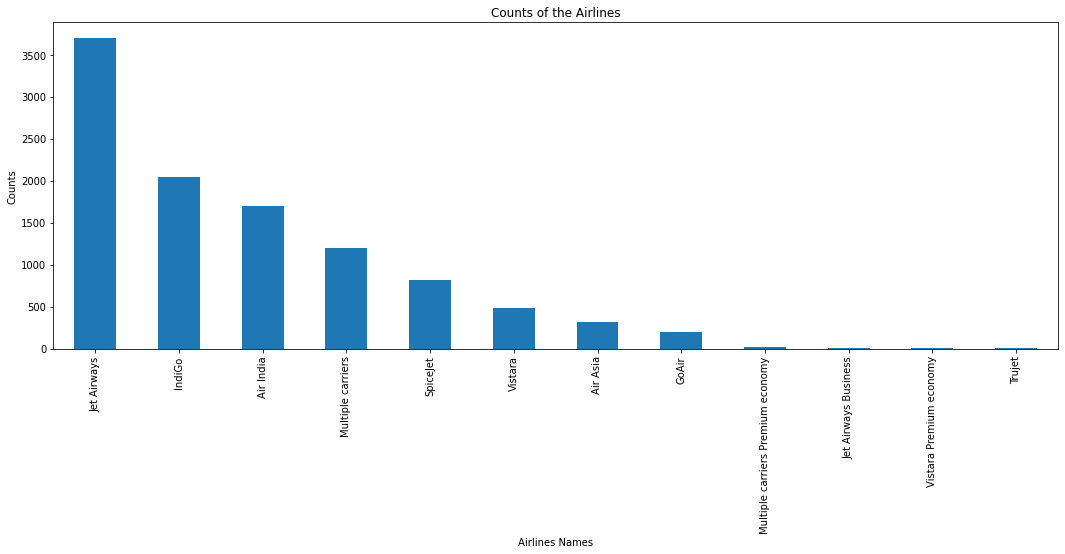

In [394]:
data['Airline'].value_counts().sort_values(ascending=False).plot(kind='bar',figsize=(18,6))
plt.xlabel('Airlines Names')
plt.ylabel('Counts')
plt.title('Counts of the Airlines')
plt.show()

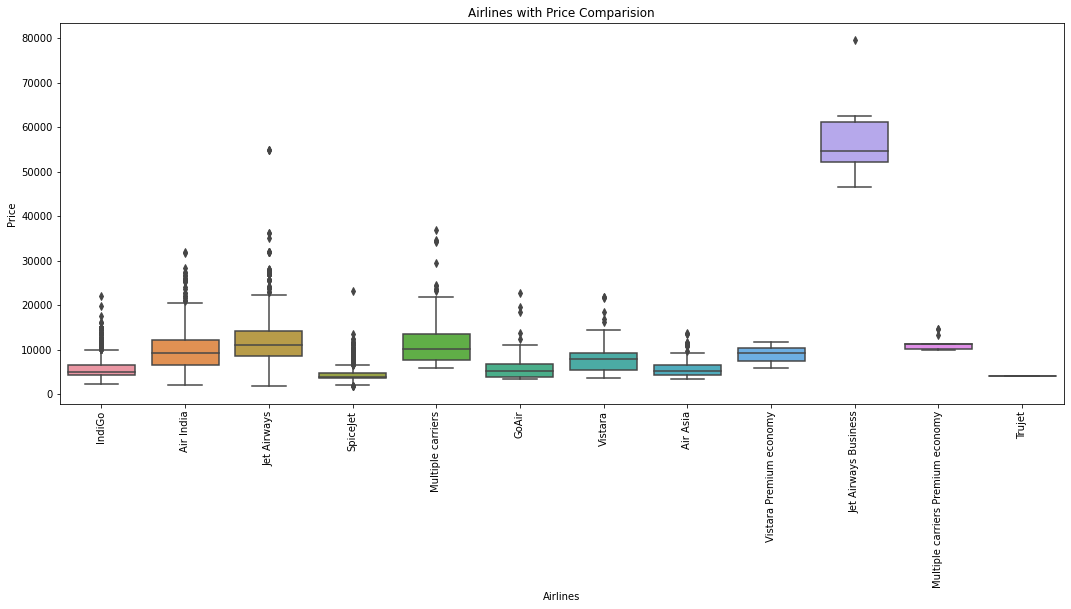

In [395]:
ax=plt.figure(figsize=(18,7))
sns.boxplot(x=data['Airline'],y=data['Price'].sort_values(ascending=True),data=data)
plt.title('Airlines with Price Comparision')
plt.xlabel('Airlines')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()
#Here we  can see the price of the Jet airways bussiness is at high.

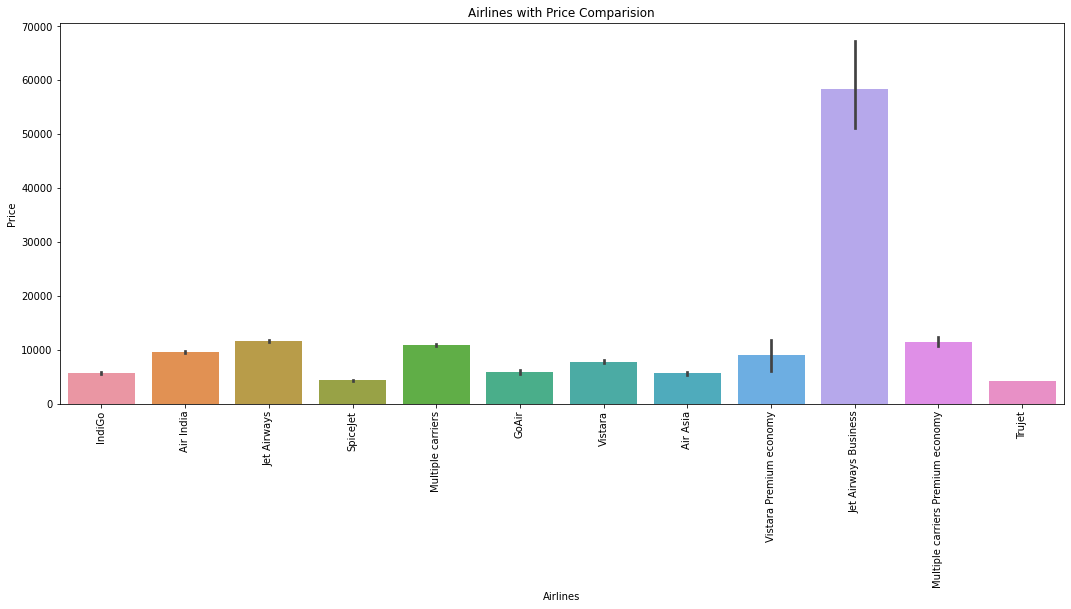

In [396]:
ax=plt.figure(figsize=(18,7))
sns.barplot(x='Airline',y='Price',data=data)
plt.title('Airlines with Price Comparision')
plt.xlabel('Airlines')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

In [398]:
data['Source'].value_counts()

Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: Source, dtype: int64

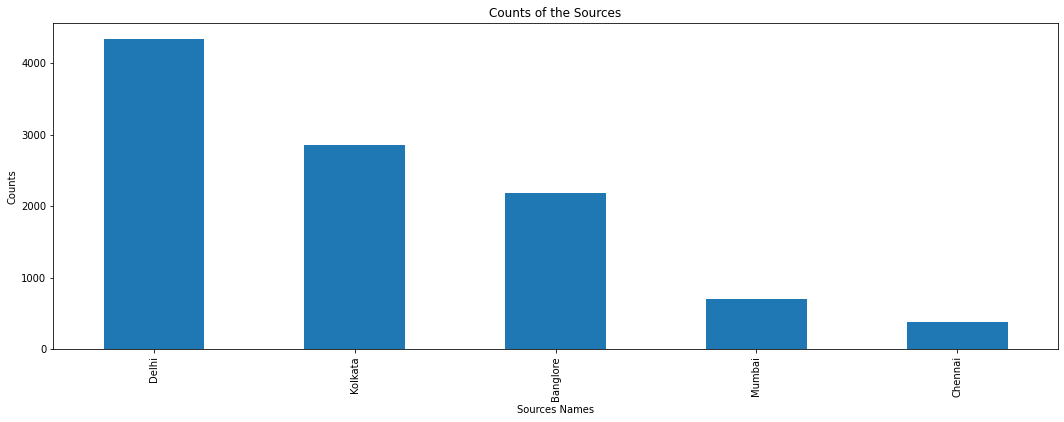

In [399]:
data['Source'].value_counts().sort_values(ascending=False).plot(kind='bar',figsize=(18,6))
plt.xlabel('Sources Names')
plt.ylabel('Counts')
plt.title('Counts of the Sources')
plt.show()

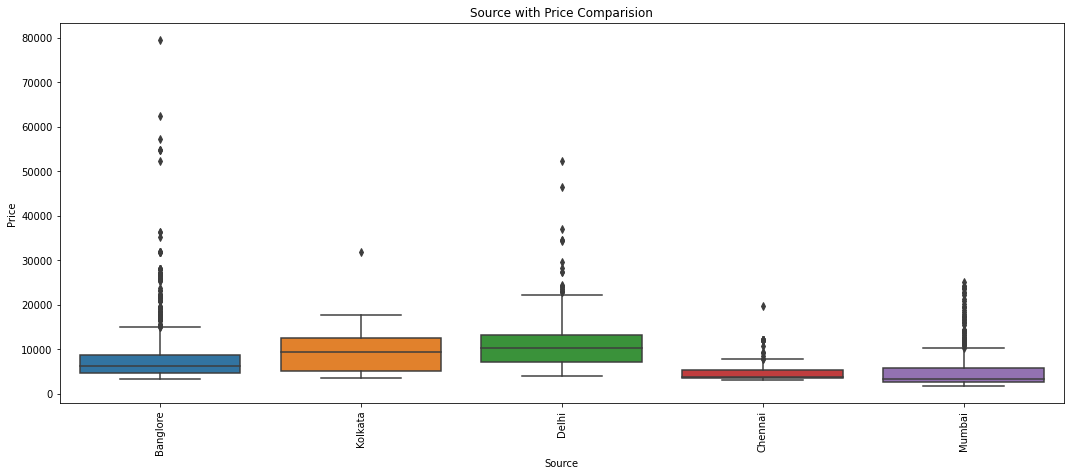

In [400]:
ax=plt.figure(figsize=(18,7))
sns.boxplot(x=data['Source'],y=data['Price'].sort_values(ascending=True),data=data)
plt.title('Source with Price Comparision')
plt.xlabel('Source')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

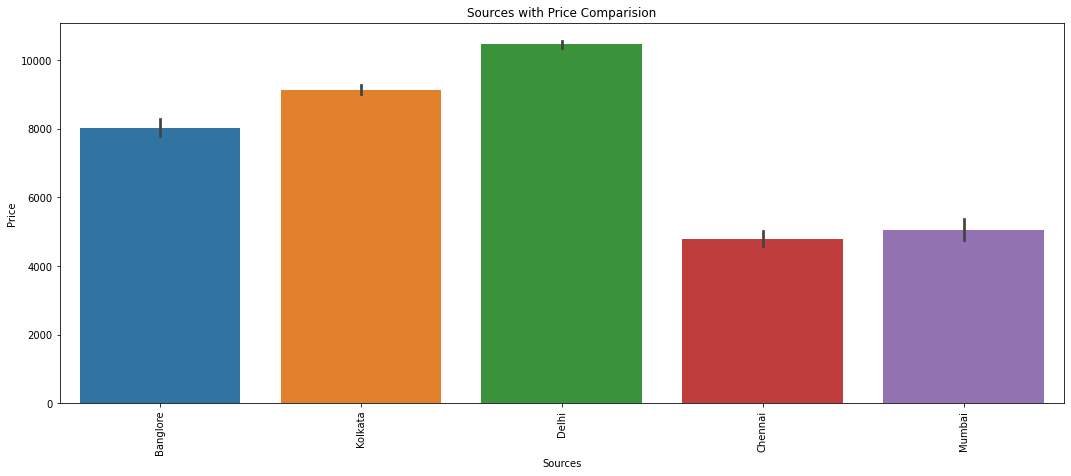

In [401]:
ax=plt.figure(figsize=(18,7))
sns.barplot(x='Source',y='Price',data=data)
plt.title('Sources with Price Comparision')
plt.xlabel('Sources')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

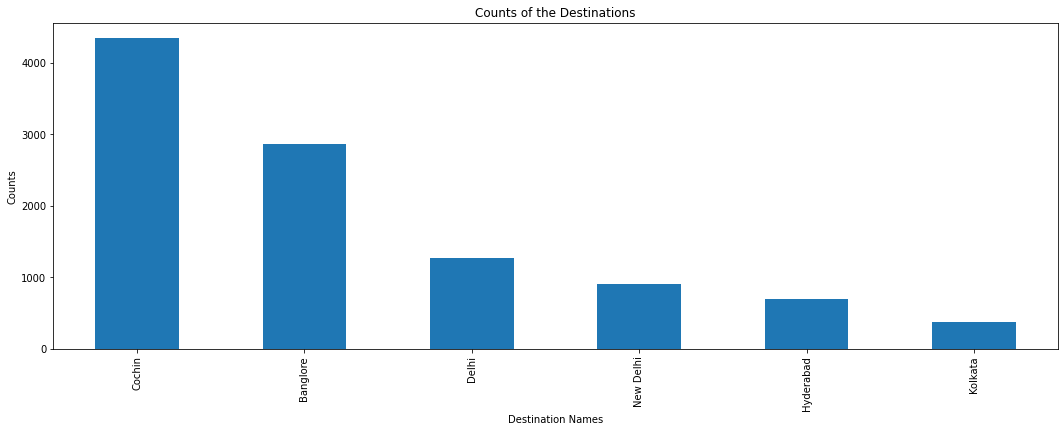

In [402]:
data['Destination'].value_counts().sort_values(ascending=False).plot(kind='bar',figsize=(18,6))
plt.xlabel('Destination Names')
plt.ylabel('Counts')
plt.title('Counts of the Destinations')
plt.show()

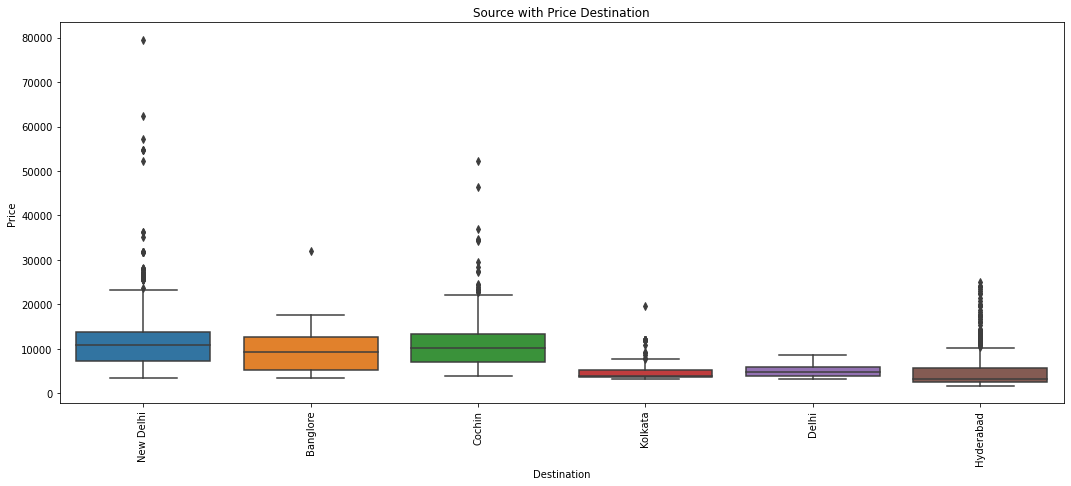

In [403]:
ax=plt.figure(figsize=(18,7))
sns.boxplot(x=data['Destination'],y=data['Price'].sort_values(ascending=True),data=data)
plt.title('Source with Price Destination')
plt.xlabel('Destination')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

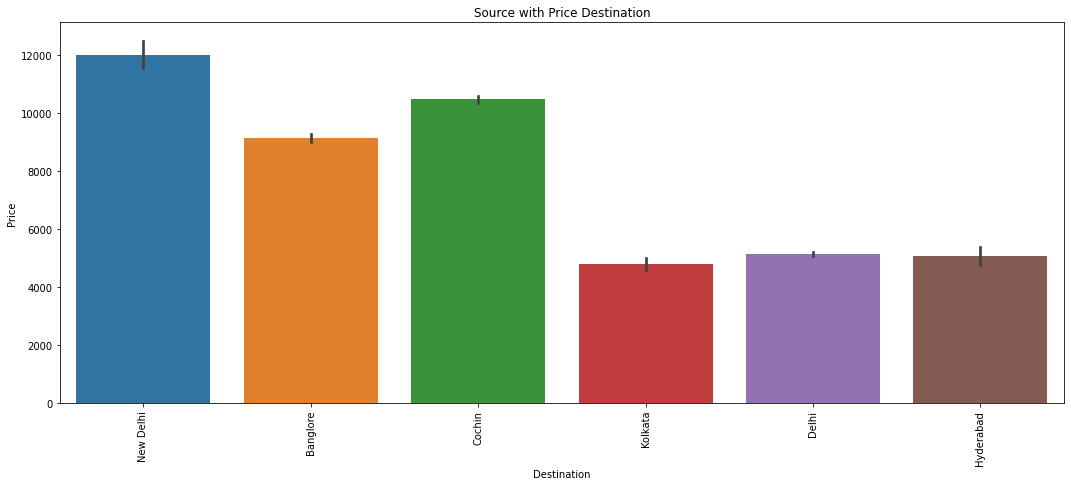

In [404]:
ax=plt.figure(figsize=(18,7))
sns.barplot(x=data['Destination'],y=data['Price'].sort_values(ascending=True),data=data)
plt.title('Source with Price Destination')
plt.xlabel('Destination')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

In [405]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [574]:
data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'])
data['Departure_day'] = data['Date_of_Journey'].dt.day
data['Departure_months'] = data['Date_of_Journey'].dt.month
data['Dep_Time']=pd.to_datetime(data['Dep_Time'])
data['Dep_Hours'] = data['Dep_Time'].dt.hour
data['Dep_Min'] = data['Dep_Time'].dt.minute

In [575]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Departure_day', 'Departure_months',
       'Dep_Hours', 'Dep_Min'],
      dtype='object')

In [576]:
data['Arrival_Time'] = pd.to_datetime(data['Arrival_Time'])
data['Arrival_Hours'] = data['Arrival_Time'].dt.hour
data['Arrival_min'] = data['Arrival_Time'].dt.minute

In [577]:
data.drop(columns=['Date_of_Journey','Dep_Time','Arrival_Time'],inplace=True)

In [578]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Departure_day', 'Departure_months',
       'Dep_Hours', 'Dep_Min', 'Arrival_Hours', 'Arrival_min'],
      dtype='object')

In [579]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Departure_day,Departure_months,Dep_Hours,Dep_Min,Arrival_Hours,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [580]:
step=data['Duration'].str.replace('h',' ')
step=step.str.replace('m','')
step=step.str.split(expand=True) 
step.fillna(00,inplace=True)
data['Duration_Hours'] = step[0]
data['Duration_min'] = step[1]

In [581]:
data.drop(columns=['Duration'],inplace=True)

In [582]:
data['Duration_Hours']=data['Duration_Hours'].astype('int')
data['Duration_min']=data['Duration_min'].astype('int')

In [583]:
data.dtypes

Airline             object
Source              object
Destination         object
Route               object
Total_Stops         object
Additional_Info     object
Price                int64
Departure_day        int64
Departure_months     int64
Dep_Hours            int64
Dep_Min              int64
Arrival_Hours        int64
Arrival_min          int64
Duration_Hours       int64
Duration_min         int64
dtype: object

## Transformation

In [584]:
data['Airline'].value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [585]:
data['Source'].value_counts()

Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [586]:
data['Destination'].value_counts()

Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

Total stops and raute are related each other so we are going to drop route

In [420]:
data['Total_Stops'].value_counts() #This is an ordinal categorical data.

1 stop      5625
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: Total_Stops, dtype: int64

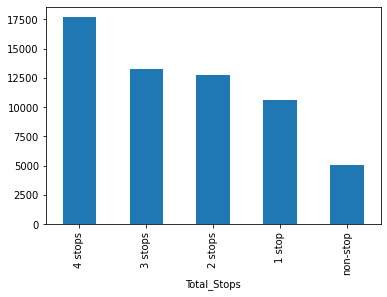

In [587]:
data.groupby('Total_Stops').mean()['Price'].sort_values(ascending=False).plot(kind='bar')
plt.show()

In [588]:
dictionary = {'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4}
data['Total_Stops'] = data['Total_Stops'].map(dictionary)

In [589]:
len(data['Additional_Info'][data['Additional_Info']=='No info'])/len(data.index)*100

#Since the data is 80% of data avalible in the form of No_info we are going to drop that columns

78.20684381571401

In [590]:
data.drop(columns=['Route','Additional_Info'],inplace=True)

In [425]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Price',
       'Departure_day', 'Departure_months', 'Dep_Hours', 'Dep_Min',
       'Arrival_Hours', 'Arrival_min', 'Duration_Hours', 'Duration_min'],
      dtype='object')

In [591]:
data1 = pd.get_dummies(data['Airline'],drop_first=True)

In [592]:
data2 = pd.get_dummies(data['Source'],drop_first=True)

In [593]:
data3 = pd.get_dummies(data['Destination'],drop_first=True)

In [594]:
dataframe= pd.concat([data1,data2,data3,data],axis=1)

In [595]:
data.drop(columns=['Airline','Source','Destination'],inplace=True)

In [599]:
dataframe.drop(columns=['Airline','Source','Destination'],inplace=True)

In [600]:
dataframe.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Total_Stops,Price,Departure_day,Departure_months,Dep_Hours,Dep_Min,Arrival_Hours,Arrival_min,Duration_Hours,Duration_min
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3897,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,7662,5,1,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,2,13882,6,9,9,25,4,25,19,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,6218,5,12,18,5,23,30,5,25
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,13302,3,1,16,50,21,35,4,45


## Test Data

In [601]:
test_data = pd.read_excel('/content/Test_set.xlsx')

In [602]:
test_data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info


In [603]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [604]:
test_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [605]:
test_data.shape

(2671, 10)

In [606]:
test_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [608]:
test_data.duplicated().sum()

26

In [525]:
test_data.drop_duplicates(inplace=True)

In [526]:
test_data['Date_of_Journey'] = pd.to_datetime(test_data['Date_of_Journey'])
test_data['Departure_day'] = test_data['Date_of_Journey'].dt.day
test_data['Departure_months'] = test_data['Date_of_Journey'].dt.month
test_data['Dep_Time']=pd.to_datetime(test_data['Dep_Time'])
test_data['Dep_Hours'] = test_data['Dep_Time'].dt.hour
test_data['Dep_Min'] = test_data['Dep_Time'].dt.minute

In [609]:
test_data['Arrival_Time'] = pd.to_datetime(test_data['Arrival_Time'])
test_data['Arrival_Hours'] = test_data['Arrival_Time'].dt.hour
test_data['Arrival_min'] = test_data['Arrival_Time'].dt.minute
test_data.drop(columns=['Date_of_Journey','Dep_Time','Arrival_Time'],inplace=True)

In [610]:
step=test_data['Duration'].str.replace('h',' ')
step=step.str.replace('m','')
step=step.str.split(expand=True)
step.fillna(00,inplace=True)
test_data['Duration_Hours'] = step[0]
test_data['Duration_min'] = step[1]
test_data.drop(columns=['Duration'],inplace=True)
test_data['Duration_Hours']=test_data['Duration_Hours'].astype('int')
test_data['Duration_min']=test_data['Duration_min'].astype('int')
test_data.dtypes

Airline            object
Source             object
Destination        object
Route              object
Total_Stops        object
Additional_Info    object
Arrival_Hours       int64
Arrival_min         int64
Duration_Hours      int64
Duration_min        int64
dtype: object

In [611]:
test_data['Total_Stops'] = test_data['Total_Stops'].map(dictionary)

In [612]:
test_data.drop(columns=['Route','Additional_Info'],inplace=True)

In [613]:
d1 = pd.get_dummies(test_data['Airline'],drop_first=True)
d2 = pd.get_dummies(test_data['Source'],drop_first=True)
d3 = pd.get_dummies(test_data['Destination'],drop_first=True)
dataframe1= pd.concat([d1,d2,d3,test_data],axis=1)

In [615]:
dataframe1.drop(columns=['Airline','Source','Destination'],inplace=True)

In [616]:
dataframe1.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Total_Stops,Arrival_Hours,Arrival_min,Duration_Hours,Duration_min
0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,4,25,10,55
1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,10,20,4,0
2,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,19,0,23,45
3,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,21,0,13,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,45,2,50


Feature Engineering.

In [617]:
x = data.drop(columns=['Price'])
y = data['Price']

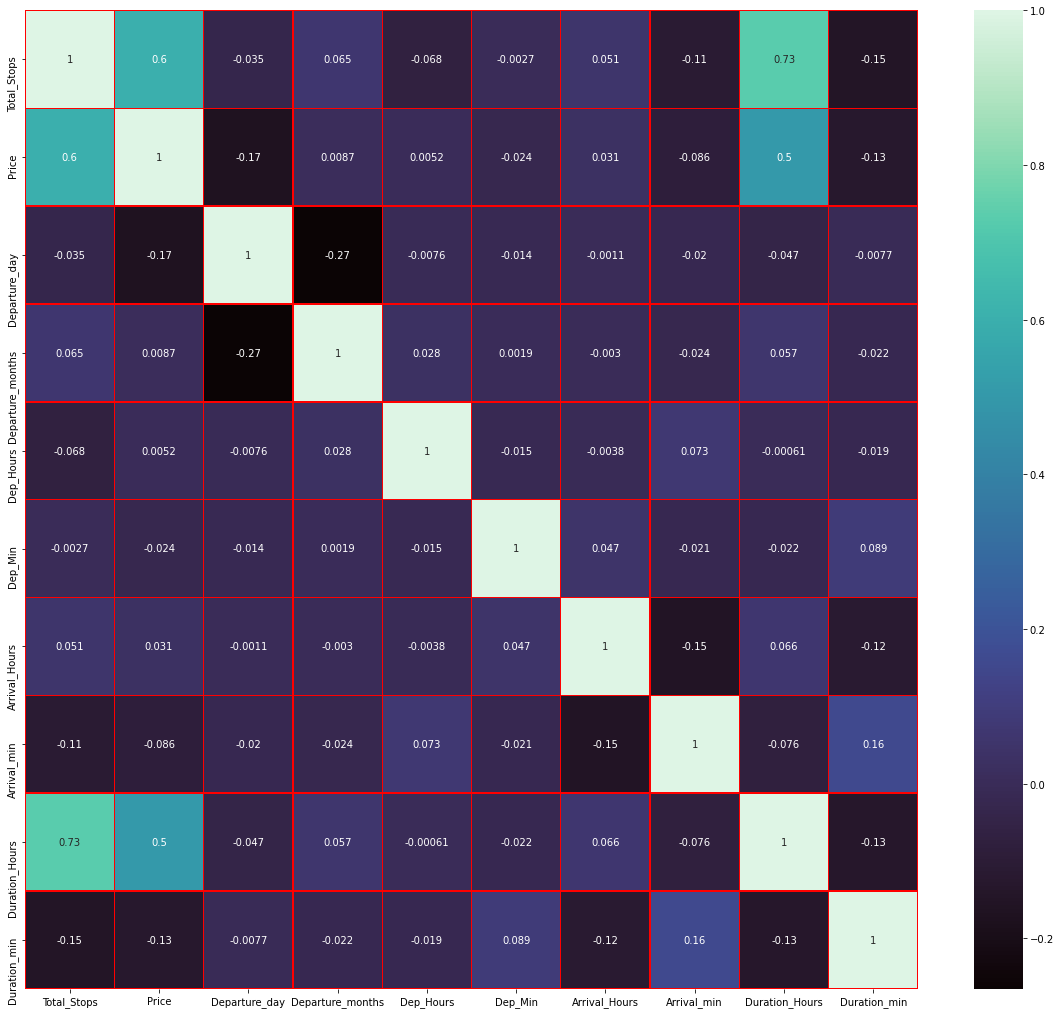

In [627]:
plt.figure(figsize=(20,18))
sns.heatmap(data.corr(),annot=True,cmap='mako',linecolor='r',linewidths=0.4)
plt.show()

In [629]:
#important features
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

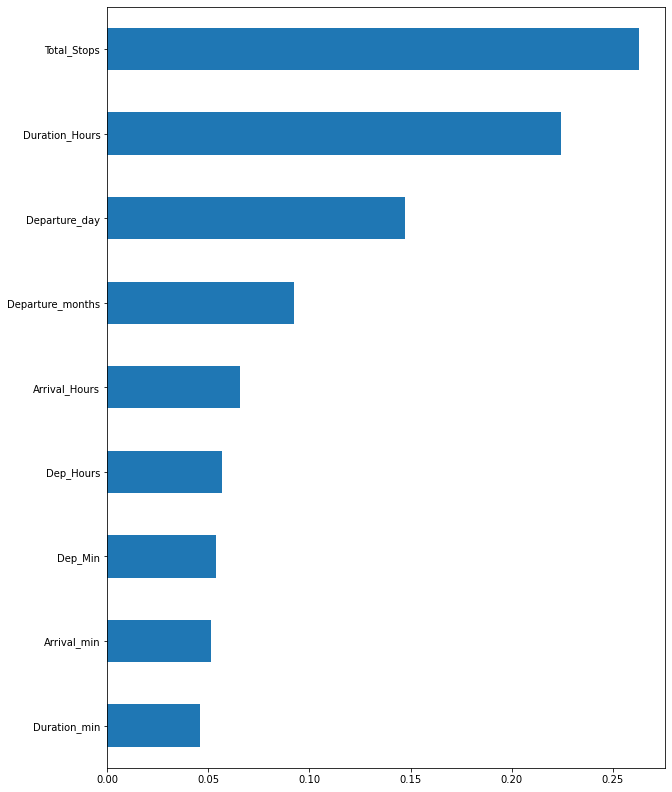

In [635]:
features_imp=pd.Series(selection.feature_importances_,index =data.drop(columns=['Price']).columns)
features_imp.sort_values(ascending=True,inplace=True)
features_imp.plot(kind='barh',figsize=(10,14))
plt.show()

## Model Building 

In [637]:
x = dataframe.drop(columns=['Price'])
y = dataframe['Price']

In [669]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=20,random_state=42)

In [639]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [640]:
y_pred=model.predict(x_test)

In [641]:
training_score = model.score(x_train,y_train)
training_score

0.9470366406282557

In [642]:
testing_score = model.score(x_test,y_test)
testing_score

0.815859786401341

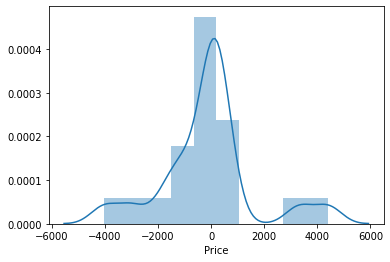

In [645]:
sns.distplot(y_test-y_pred,kde=True)
plt.show()

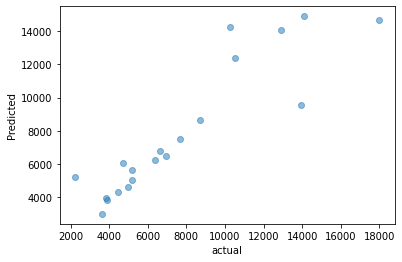

In [647]:
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel('actual')
plt.ylabel('Predicted')
plt.show()

In [648]:
from sklearn.metrics import mean_squared_error,r2_score

In [651]:
print('R2 score :',r2_score(y_test,y_pred))

R2 score : 0.815859786401341


In [657]:
np.sqrt(mean_squared_error(y_test,y_pred))

1788.0637282137186

In [655]:
np.std(y_test)

4166.857726152885

In [658]:
np.std(y_pred)

3929.7297324218125

## Hyperparamter Tunning.

In [659]:
from sklearn.model_selection import RandomizedSearchCV

In [660]:
model = RandomForestRegressor()
#n_estimators=100, criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1,
# min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, 
#min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False,
# ccp_alpha=0.0, max_samples=None)

In [664]:
n_estimators = [int(x) for x in np.linspace(100,1200,12)]
max_features =['auto','sqrt']
max_depth = [int(x) for x in np.linspace(5,30,6)]
min_samples_split = [2,5,10,15,100]
min_samples_leaf =[1,2,5,10]

In [665]:
directory = {'n_estimators':n_estimators,'max_features':max_features,'max_depth':max_depth,'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf}

In [671]:
model_cv = RandomizedSearchCV(model,directory,scoring='neg_mean_squared_error',n_jobs=1,cv=5)

In [672]:
model_cv.fit(x_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [674]:
model_cv.best_params_

{'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 100}

In [677]:
prediction = model_cv.predict(x_test)

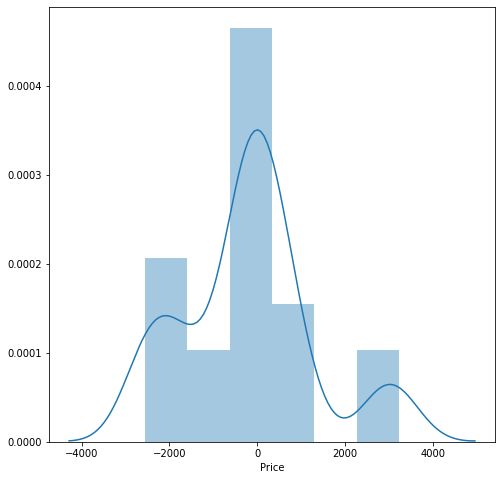

In [678]:
plt.figure(figsize=(8,8))
sns.distplot(y_test-prediction)
plt.show()

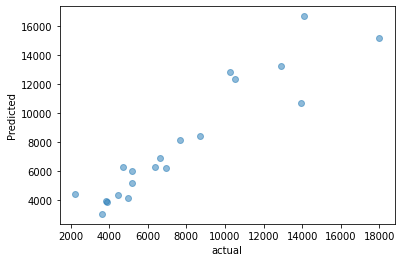

In [679]:
plt.scatter(y_test,prediction,alpha=0.5)
plt.xlabel('actual')
plt.ylabel('Predicted')
plt.show()

In [681]:
np.sqrt(mean_squared_error(y_test,prediction))

1493.0525186707587

## Save The model and Reuse.

In [683]:
import pickle

In [686]:
file = open('Model.h5',mode='wb')

In [687]:
save_model = pickle.dump(model_cv,file)

In [689]:
#reuse

In [691]:
load_model = pickle.load(open('/content/Model.h5','rb'))

In [692]:
predict=load_model.predict(x_test)

In [694]:
print('R2 Score :',r2_score(y_test,predict))

R2 Score : 0.8716095193410814


#Thank You !!